+--------+--------+-----+--------+------------+-------------+
|  t_n   |  r_n   |  n  | Actual | Abs. error | %Rel. error |
+--------+--------+-----+--------+------------+-------------+
| 0.0000 | 0.0000 |  0  | 0.0000 |   0.0000   |     nan     |
| 0.0001 | 0.0003 |  1  | 0.0003 |   0.0000   |    0.0532   |
| 0.0002 | 0.0006 |  2  | 0.0006 |   0.0000   |    0.0288   |
| 0.0004 | 0.0009 |  3  | 0.0009 |   0.0000   |    0.0043   |
| 0.0005 | 0.0012 |  4  | 0.0012 |   0.0000   |    0.0201   |
| 0.0006 | 0.0015 |  5  | 0.0015 |   0.0000   |    0.0445   |
| 0.0007 | 0.0018 |  6  | 0.0018 |   0.0000   |    0.0689   |
| 0.0009 | 0.0021 |  7  | 0.0021 |   0.0000   |    0.0933   |
| 0.0010 | 0.0024 |  8  | 0.0024 |   0.0000   |    0.1178   |
| 0.0011 | 0.0027 |  9  | 0.0027 |   0.0000   |    0.1422   |
| 0.0012 | 0.0030 |  10 | 0.0030 |   0.0000   |    0.1667   |
| 0.0013 | 0.0033 |  11 | 0.0033 |   0.0000   |    0.1911   |
| 0.0015 | 0.0036 |  12 | 0.0036 |   0.0000   |    0.2156   |
| 0.0016

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide


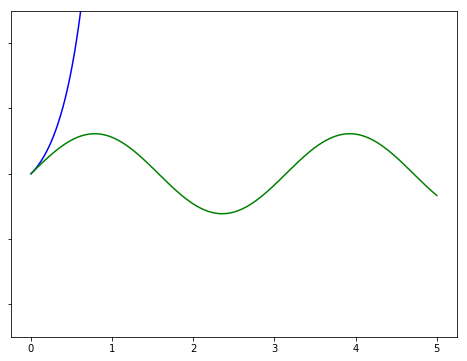

In [10]:
from prettytable import PrettyTable
from matplotlib import pyplot as plt
import numpy as np

w = 2
g = 9.81
c1 = 0
c2 = 0
# Initial conditions.
u_0 = 2.45
t_0 = 0
r_0 = 0
h = float(1/8192)
target = 5

def derivative(r, t, counter=None):
    # Calculate the derivative given r, t
    return (w**2 * t) - (g * np.sin(w * r)) 

def func(r, t=None):
    # Calculate the "actual" values if we have a solution of the ODE
    return (c1 * np.exp(w * r)) + \
        (c2 * np.exp(-1 * w * r)) + \
        ((g / (2 * w**2)) * np.sin(w * r))

def euler_improved_2nd():
    """Improved Euler method.  Return array with t values."""
    r_arr = np.arange(r_0, target, h)
    # Allocate memory for array, fill with zeros
    t_arr = np.zeros(r_arr.shape[0])
    u_arr = np.array(t_arr)

    u_arr[0] = u_0
    t_arr[0] = t_0
    for n, r_n in enumerate(r_arr[:-1]):
        # This part is the same as with a first-order ODE, except with u'(0)
        u_n = u_arr[n]
        u_nsplat = u_n + h * derivative(r_n, u_n)
        u_arr[n + 1] = u_n + h * (derivative(r_n, u_n) + derivative(r_n + h, u_nsplat)) / 2
        # Now we have to substitute in the initial conditions for r(0)
        t_n = t_arr[n]
        t_n += h * u_arr[n + 1]
        t_arr[n + 1] = t_n
    return t_arr

def make_table(r_arr, t_arr, prec):
    """Generate a human-friendly table based on a pair (r,t) of arrays."""
    tbl = PrettyTable()
    tbl.field_names = ["t_n", "r_n", "n", "Actual", "Abs. error", "%Rel. error"]
    tbl.float_format=prec
    actual = func(r_arr, t_arr)
    abs_err = np.absolute(actual - t_arr)
    with np.errstate(divide='ignore'):
        rel_err = np.divide(abs_err,  np.absolute(actual)) * 100
    for n, (r_n, t_n) in enumerate(zip(r_arr, t_arr)):
        tbl.add_row([r_n, t_n, n, actual[n], abs_err[n], rel_err[n]])
        if n > 200:
            break
    print(tbl)

    fig = plt.figure(figsize=(8,6))
    ax1 = fig.add_subplot(111)
    ax1.set_ylim(-5, 5)
    ax1.plot(r_arr, t_arr, color="blue")
    ax1.plot(r_arr, actual, color="green")
    plt.setp(ax1.get_yticklabels(), visible=False)
    plt.show()

r_n = np.arange(r_0, target, h)
prec = "1.4"
make_table(r_n, euler_improved_2nd(), prec)